Physical Power and velocity
===========================
velo includes a simple model to infere power from velocity and slope and vice versa

    P(v) = P_Air + P_Wheel + P_Climb
    P(v) = 1/2*rho*CdA*v^3 + Crr*M*g*v + slope*M*g*v
    
    a = 0.5*rho*CdA
    b = (Crr + slope)*M*g
    p = a*v^3 + b*v

According to wolframalpha the Inverse of p = a*v^3 + b*v is:

    v = (9 a^2 p+sqrt(3) sqrt(27 a^4 p^2+4 a^3 b^3))^(1/3)/(2^(1/3) 3^(2/3) a)-((2/3)^(1/3) b)/(9 a^2 p+sqrt(3) sqrt(27 a^4 p^2+4 a^3 b^3))^(1/3)

Let's see what we can derive. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#plt.rc('figure', figsize=(10, 6)) # a bit larger

First let's understand the overall structure of a*v^3+b*v.
We have

    a = 1/2 * rho_air * CdA = 0.5 * 1.192 kg/m^3 * 0.33 m^2 = 0.19668 kg/m and
    b = (Crr + slope) * g * M_total = (0.0037 + slope) * 9.81 m/s^2 * 84 kg  = 3.04894 kg*m/s^2 if slope = 0
    
a and b seem have no direct meaning on their own but are defined for convenience.<br>
Next we use classical numpy-plotting technique because we want to plot p an it's inverse v.

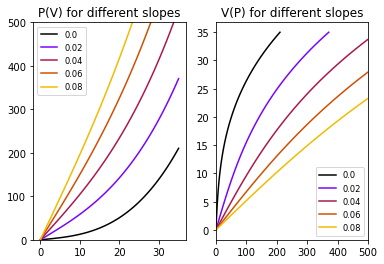

In [18]:
def p_simple(v,slope=0):
    v = v/3.6  # km/h->m/s
    return 0.5*1.192*0.33*v**3 + (0.0037 + slope)*9.81*84. * v 

V=np.linspace(0,35)
plot_slopes=[0.0, 0.02, 0.04, 0.06, 0.08]

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

colormap = plt.cm.gnuplot # see http://matplotlib.org/1.3.1/examples/color/colormaps_reference.html
colors = [colormap(i) for i in np.linspace(0, 0.9, len(plot_slopes))]
ax1.set_prop_cycle('color', colors)
ax2.set_prop_cycle('color', colors)
for sl in plot_slopes:
    P=np.array([p_simple(x,sl) for x in V])
    ax1.plot(V,P,label=str(sl))
    ax2.plot(P,V,label=str(sl))
ax1.legend(loc='best',fontsize="small")
ax1.set_title("P(V) for different slopes")
ax2.legend(loc='best',fontsize="small")
ax2.set_title("V(P) for different slopes")
ax1.set_ylim(0,500);
ax2.set_xlim(0,500);

So the function and it's inverse look rather monotonuos. Let's see if we can derive V(P) analytically.
First we have to load sympy.

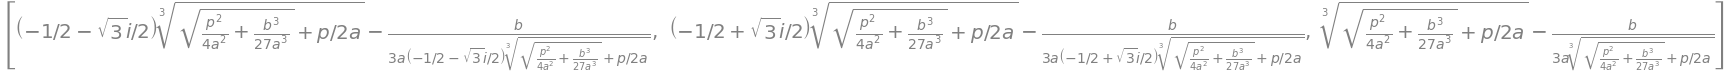

In [19]:
import sympy as sym
from sympy import sqrt
sym.init_printing()

#v, p, a, b = symbols('v p a b')
a = sym.Symbol('a', real=True, positive=True)
b = sym.Symbol('b', real=True)
v = sym.Symbol('v', real=True, positive=True)
p = sym.Symbol('p', real=True, positive=True)

#p=a*v**3+b*v
g = a*v**3+b*v-p
sol = sym.solve(g,v)
sol


Only one non-complex solution:

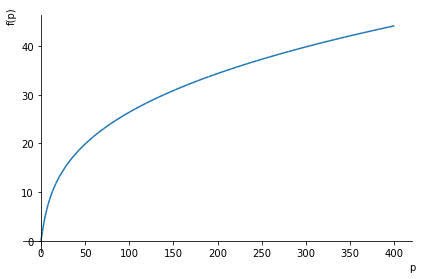

In [20]:
v_p = 3.6*sol[2].subs({a:0.19668, b:3.04894})
vplot = sym.plot(v_p,(p,0,400.))
#plt.show(vplot)


And the same for the analytical expression of wolframalpha

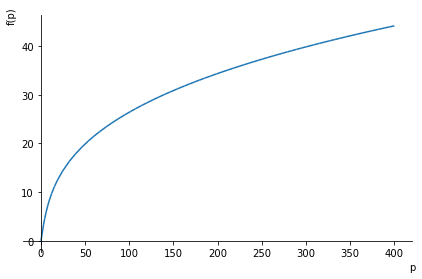

In [26]:
wa = 3.6*((9*a**2*p+sqrt(3)*sqrt(27*a**4*p**2+4*a**3*b**3))**(1/3)/(2**(1/3)*3**(2/3)*a)-((2/3)**(1/3)*b)/(9*a**2*p+sqrt(3)*sqrt(27*a**4*p**2+4*a**3*b**3))**(1/3))
wa = wa.subs({a:0.19668, b:3.04894})
wplot = sym.plot(wa,(p,0,400))


In [29]:
plt.show((vplot, wplot))
#plt.show(vplot)

Both expressions are pretty much the same, allthough sympy doesn't recognize this analyticaly. But their difference vanishes for any reasonable P.

In [24]:
[v_p.subs({p:psubs}).evalf()-wa.subs({p:psubs}).evalf() for psubs in range(0,1000,50)]


So to be happy we are going to proceed with the sympy solution for v(P) in units of km/h (thus the factor 3.6):

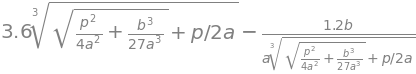

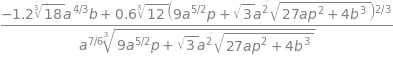

In [16]:
v_p=3.6*sol[2]
display(v_p,
v_p.factor(),
v_p.expand(),
v_p.simplify())


Or to be used in python:

In [25]:
sym.print_python(v_p)

p = Symbol('p')
e = Float('8.1834458417605145', precision=53)*(Float('0.21642561946535444', precision=53)*p + sqrt(Float('0.046840048760962399', precision=53)*p**2 + 1))**Rational(1, 3) - Float('8.1834458417605163', precision=53)/(Float('0.21642561946535444', precision=53)*p + sqrt(Float('0.046840048760962399', precision=53)*p**2 + 1))**Rational(1, 3)
